Cargar las carpetas del drive personal

In [1]:
# prompt: importar carpetas de drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#### Link google drive dataset
https://drive.google.com/drive/folders/1tObX7HBwT7-yVUt-iC0_FTfDWB4zOv75?usp=sharing

## Dataset Subset

In [2]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import glob
import json
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from pathlib import Path

In [3]:
# Setup directories
os.chdir("/content/drive/MyDrive/Modulo3_Grupo12")   # change dir to content/drive
root_path = Path(os.getcwd())
print(root_path)

# directories
train_dir = root_path / "dataset_subset" / "train"
val_dir = root_path / "dataset_subset" / "val"
test_dir = root_path / "dataset_subset" / "test"

/content/drive/.shortcut-targets-by-id/1tObX7HBwT7-yVUt-iC0_FTfDWB4zOv75/Modulo3_Grupo12


In [4]:
train_dir

PosixPath('/content/drive/.shortcut-targets-by-id/1tObX7HBwT7-yVUt-iC0_FTfDWB4zOv75/Modulo3_Grupo12/dataset_subset/train')

In [5]:
# full dataset ..... make subset
classes_full = os.listdir(root_path / "dataset_full")
len(classes_full)

30

In [6]:
print(classes_full)

['FreshAlpukat', 'FreshCucumber', 'FreshOrange', 'FreshBellpepper', 'FreshMango', 'FreshCabbage', 'FreshCarrot', 'FreshDragonfruit', 'FreshBanana', 'FreshApple', 'FreshPapaya', 'FreshPotato', 'RottenBellpepper', 'RottenApple', 'RottenBanana', 'FreshTomato', 'FreshStrawberry', 'FreshSpinach', 'RottenAlpukat', 'RottenCarrot', 'RottenCabbage', 'RottenCucumber', 'RottenDragonfruit', 'RottenPapaya', 'RottenStrawberry', 'RottenOrange', 'RottenTomato', 'RottenPotato', 'RottenMango', 'RottenSpinach']


In [8]:
classes_subset = ['FreshApple', 'FreshBanana', 'FreshBellpepper', 'FreshOrange', 'FreshStrawberry',
                  'RottenApple', 'RottenBanana', 'RottenBellpepper', 'RottenOrange', 'RottenStrawberry']

### Create data splits dirs

In [7]:
#  la idea de 'create_data_splits', fue crear un subset del dataset con imagenes balanceadas y clases acotadas principalmente para testear el codigo.
#  originalmente se crearia un symlink, pero google colab no lo soporta.

In [9]:
import os
import random
import shutil

def create_data_splits(root_path,
                       classes_subset,
                       train_dir, test_dir, val_dir,
                       train_len, test_len, val_len,
                       SEED):

    # Set the manual seeds
    random.seed(SEED)

    for directory in [train_dir, test_dir, val_dir]:

        if os.path.exists(directory):
            shutil.rmtree(directory)

        if not os.path.exists(directory):
            os.makedirs(directory, exist_ok=True)
            [os.makedirs(os.path.join(directory, folder), exist_ok=True) for folder in classes_subset]

    # Iterate through each class
    for class_name in classes_subset:
        class_path = root_path / class_name
        images = os.listdir(class_path)

        # Shuffle the images to get a random sample
        random.shuffle(images)

        if (train_len+test_len+val_len) <= len(images):
            # Create copy in train_dir
            for image in images[:train_len]:
                src_path = class_path / image
                dst_path = train_dir / class_name / image
                shutil.copy(src_path, dst_path)

            # Create copy in test_dir
            for image in images[train_len:train_len + test_len]:
                src_path = class_path / image
                dst_path = test_dir / class_name / image
                shutil.copy(src_path, dst_path)

            # Create copy in val_dir
            for image in images[train_len + test_len:train_len + test_len + val_len]:
                src_path = class_path / image
                dst_path = val_dir / class_name / image
                shutil.copy(src_path, dst_path)
        else:
            print("total number of images is less than images to train, val, test")


In [10]:
# create_data_splits
SEED = 42

# amount of images to process
train_len=300
val_len=100
test_len=50

#create_data_splits(root_path / "dataset_full", classes_subset, train_dir, test_dir, val_dir, train_len, test_len, val_len, SEED)

### Balanced data review

In [11]:
# balanced data review dataset full
files_dataset_full = {'classes':[], 'len_files':[]}
for root_dir, cur_dir, files in os.walk(os.path.join(root_path / "dataset_full")):
    files_dataset_full['classes'].append(root_dir.split('/')[-1])
    files_dataset_full['len_files'].append(len(files))
pd.DataFrame(files_dataset_full).sort_values(by=['len_files'], ascending=False).T

15           14           9           10            26  \
classes    RottenBanana  RottenApple  FreshBanana  FreshApple  RottenOrange   
len_files          2800         2342         2205        1702          1605   

                    3            29            6              21  \
classes    FreshOrange  RottenMango  FreshCabbage  RottenCabbage   
len_files         1466         1410          1008            988   

                      30  ...              22                13            28  \
classes    RottenSpinach  ...  RottenCucumber  RottenBellpepper  RottenPotato   
len_files            880  ...             593               591           585   

                     20           11            1             24  \
classes    RottenCarrot  FreshPapaya  FreshAlpukat  RottenPapaya   
len_files           580          567           276           216   

                      19                 23            0   
classes    RottenAlpukat  RottenDragonfruit  dataset_full  
len_files            144                 20             0  

[2 rows x 31 columns]

In [12]:
# balanced data review train dataset subset
files_dataset_subset = {'classes':[], 'len_files':[]}
for root_dir, cur_dir, files in os.walk(os.path.join(root_path / "dataset_subset/train")):
    files_dataset_subset['classes'].append(root_dir.split('/')[-1])
    files_dataset_subset['len_files'].append(len(files))
pd.DataFrame(files_dataset_subset).sort_values(by=['len_files'], ascending=False).T

1            2                3            4   \
classes    FreshApple  FreshBanana  FreshBellpepper  FreshOrange   
len_files         300          300              300          300   

                        5            6             7                 8   \
classes    FreshStrawberry  RottenApple  RottenBanana  RottenBellpepper   
len_files              300          300           300               300   

                     9                 10     0   
classes    RottenOrange  RottenStrawberry  train  
len_files           300               300      0

In [13]:
# balanced data review val dataset subset
files_dataset_subset = {'classes':[], 'len_files':[]}
for root_dir, cur_dir, files in os.walk(os.path.join(root_path / "dataset_subset/val")):
    files_dataset_subset['classes'].append(root_dir.split('/')[-1])
    files_dataset_subset['len_files'].append(len(files))
pd.DataFrame(files_dataset_subset).sort_values(by=['len_files'], ascending=False).T

1            2                3            4   \
classes    FreshApple  FreshBanana  FreshBellpepper  FreshOrange   
len_files         100          100              100          100   

                        5            6             7                 8   \
classes    FreshStrawberry  RottenApple  RottenBanana  RottenBellpepper   
len_files              100          100           100               100   

                     9                 10   0   
classes    RottenOrange  RottenStrawberry  val  
len_files           100               100    0

In [14]:
# balanced data review test dataset subset
files_dataset_subset = {'classes':[], 'len_files':[]}
for root_dir, cur_dir, files in os.walk(os.path.join(root_path / "dataset_subset/test")):
    files_dataset_subset['classes'].append(root_dir.split('/')[-1])
    files_dataset_subset['len_files'].append(len(files))
pd.DataFrame(files_dataset_subset).sort_values(by=['len_files'], ascending=False).T

1            2                3            4   \
classes    FreshApple  FreshBanana  FreshBellpepper  FreshOrange   
len_files          50           50               50           50   

                        5            6             7                 8   \
classes    FreshStrawberry  RottenApple  RottenBanana  RottenBellpepper   
len_files               50           50            50                50   

                     9                 10    0   
classes    RottenOrange  RottenStrawberry  test  
len_files            50                50     0

## ETAPA 1:  Clasic Machine Learning

### **ETAPA 1:**
1. Extracción de características desde las imágenes pertenecientes al conjunto de datos utilizando OpenCV
2. Conformación del conjunto de datos estructurado en un archivo de texto plano (csv)
3. Aplicar algoritmos de machine learning para resolver la tarea de clasificación de tres tipos de flores utilizando el dataset estructurado

Cargar librerías

In [15]:
import cv2
import csv
import numpy as np
from os import system
import os
import glob
import pywt

Código para extraer características con OpenCV

In [16]:
def histograma_plano(img):
	hist = cv2.calcHist([img], [0], None, [8], [0, 256])
	hist=hist.tolist()
	histograma = [elemento for sublista in hist for elemento in sublista]
	return histograma

def medidas(img):
	F1 = np.std(img)
	F2 = np.mean(img)
	F3 = np.median(img)
	return F1, F2, F3

Cambiar el enlace de la variable dir_images con cada carpeta
que tengan en el dataset.

Darle un número para cada clase o carpeta de su dataset.

El código puede ser perfectamente mejorado, quienes deseen pueden hacerlo.

CARGA DE IMAGENES POR CLASES

In [17]:
Dataset=[]
columns_names=["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","class"]
Dataset.append(columns_names)

root_folder = 'dataset_subset'
sub_folder = 'train'

class_num = 1
for dir in glob.iglob(os.path.join(root_folder, sub_folder, '*')):

    for file in glob.iglob(os.path.join(dir, '*')):
        Features=[]
        # Load an image
        img = cv2.imread(file,0)
        if not img is None and img.size > 0:
            f1_std_dev = np.std(img)
            f2_mean = np.mean(img)
            f3_median = np.median(img)
            hist = cv2.calcHist([img], [0], None, [8], [0, 256])
            hist=hist.tolist()
            histograma = [elemento for sublista in hist for elemento in sublista]
            cA, (cH, cV, cD) = pywt.dwt2(img, 'haar')
            f1cA, f2cA, f3cA = medidas(cA)
            f1cH, f2cH, f3cH = medidas(cH)
            f1cV, f2cV, f3cV = medidas(cV)
            f1cD, f2cD, f3cD = medidas(cD)
            Features.append(f1_std_dev)
            Features.append(f2_mean)
            Features.append(f3_median)
            Features.append(f1cA)
            Features.append(f2cA)
            Features.append(f3cA)
            Features.append(f1cH)
            Features.append(f2cH)
            Features.append(f3cH)
            Features.append(f1cV)
            Features.append(f2cV)
            Features.append(f3cV)
            Features.append(f1cD)
            Features.append(f2cD)
            Features.append(f3cD)
            for ind in range(len(histograma)):
              Features.append(histograma[ind])
            Features.append(class_num)
        else:
            print("La imagen está vacía.")
        Dataset.append(Features)
    print(class_num)
    class_num +=1

1
2
3
4
5
6
7
8
9
10


In [18]:
pd.DataFrame(Dataset).sample(5)

0           1      2           3           4      5          6   \
2128   80.346127   192.61926  252.0  159.061973  385.608929  504.0  14.885943   
2985   20.683507  122.858498  129.0   40.870533  245.716996  258.5    3.63779   
1430   41.376244  145.653241  161.0   82.581125  291.306481  322.0   3.226546   
1312   29.986513  107.841299  109.0   58.931271  215.682597  218.0   6.705364   
502   106.104644  174.587505  216.0  211.851051  349.175011  431.0   6.210047   

            7    8          9   ...   14       15      16       17       18  \
2128  0.061295  0.0  14.395517  ...  0.0     24.0  5621.0  17719.0   6218.0   
2985  0.100526  0.0   4.935782  ...  0.0      0.0    14.0   8291.0  14992.0   
1430  0.085977  0.0   4.064351  ...  0.0    837.0  4858.0   1362.0   1364.0   
1312  0.197345  0.0   8.295965  ...  0.0    886.0  3930.0  10566.0  20930.0   
502   -0.01431  0.0   9.735298  ...  0.0  67882.0   113.0    111.0    140.0   

           19       20       21        22  23  
2128   2553.0   1664.0   1476.0   57405.0   8  
2985  25673.0   1152.0     54.0       0.0  10  
1430  12118.0  29637.0      0.0       0.0   5  
1312  13035.0    829.0      0.0       0.0   5  
502     527.0   8990.0  59425.0  123196.0   2  

[5 rows x 24 columns]

In [19]:
with open('dataset_estructurado.csv', 'w', newline='') as archivo_csv:
    # Creamos un objeto writer
    writer = csv.writer(archivo_csv)
    for fila in Dataset:
      writer.writerow(fila)

### **ENTRENAMIENTO DEL DATASET ESTRUCTURADO UTILIZANDO MACHINE LEARNING CLÁSICO**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

# Ajustar la semilla para asegurar repetibilidad en los resultados
np.random.seed(42)

In [21]:
# Carga de dataset
data = pd.read_csv('dataset_estructurado.csv')

# Verificación de cargue del dataset: cabecera
data.sample(5)

f1          f2     f3          f4          f5      f6  \
1801  108.630936  148.641628  182.0  217.036256  297.283257  362.75   
1190   53.596376  182.150791  164.0  106.932268  364.301582  327.50   
1817   49.216214  117.836738  112.5   96.078727  235.673476  225.00   
251    76.508014  124.892908  116.0  152.263240  249.785817  232.00   
2505   71.128588  138.900826  145.0  141.329517  277.801653  288.50   

             f7        f8   f9        f10  ...  f15      f16      f17  \
1801   7.190376  0.079062  0.0   6.612601  ...  0.0  30600.0   8564.0   
1190   5.329790 -0.001938  0.0   5.094384  ...  0.0      0.0    175.0   
1817  15.006640 -0.029588  0.0  11.211138  ...  0.0   9472.0  22296.0   
251    9.993386 -0.003909  0.0  10.240878  ...  0.0  22912.0    572.0   
2505  10.183540  0.163015  0.0  12.159487  ...  0.0   5808.0   3007.0   

          f18      f19      f20      f21      f22      f23  class  
1801   8778.0   8617.0   2377.0   1761.0   2384.0  57255.0      7  
1190    720.0  20701.0  26993.0  25918.0   3131.0  37926.0      4  
1817  60802.0  58719.0  39172.0  45472.0  17498.0    725.0      7  
251   17903.0  44504.0  24528.0  10179.0   2324.0  24942.0      1  
2505   4216.0   9560.0   6515.0   5647.0  17791.0    212.0      9  

[5 rows x 24 columns]

In [22]:
#obtener características generales del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      3000 non-null   float64
 1   f2      3000 non-null   float64
 2   f3      3000 non-null   float64
 3   f4      3000 non-null   float64
 4   f5      3000 non-null   float64
 5   f6      3000 non-null   float64
 6   f7      3000 non-null   float64
 7   f8      3000 non-null   float64
 8   f9      3000 non-null   float64
 9   f10     3000 non-null   float64
 10  f11     3000 non-null   float64
 11  f12     3000 non-null   float64
 12  f13     3000 non-null   float64
 13  f14     3000 non-null   float64
 14  f15     3000 non-null   float64
 15  f16     3000 non-null   float64
 16  f17     3000 non-null   float64
 17  f18     3000 non-null   float64
 18  f19     3000 non-null   float64
 19  f20     3000 non-null   float64
 20  f21     3000 non-null   float64
 21  f22     3000 non-null   float64
 22  

In [23]:
# estadisticas
data.describe()

f1           f2           f3           f4           f5  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean     62.987173   150.774721   160.208333   125.040394   301.562301   
std      22.919165    38.913343    53.098066    45.960664    77.846540   
min      10.721643    19.122921     0.000000    20.842726    38.109798   
25%      43.587317   123.560020   121.000000    86.140295   247.120041   
50%      63.643214   148.268843   156.500000   126.350174   296.537686   
75%      81.547169   178.696079   197.000000   162.309529   357.580462   
max     118.780318   244.968590   255.000000   237.163337   489.937181   

                f6           f7           f8           f9          f10  ...  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000  ...   
mean    320.084083     8.674518     0.059474     0.016750     9.067042  ...   
std     105.761494     4.406170     0.274397     0.132115     4.402568  ...   
min       0.000000     1.306697    -4.274800    -1.000000     1.260407  ...   
25%     241.500000     4.958618    -0.008906     0.000000     5.389330  ...   
50%     313.000000     8.496275     0.022719     0.000000     8.992622  ...   
75%     392.000000    11.215897     0.114945     0.000000    11.436826  ...   
max     510.000000    33.065784     4.235400     3.000000    32.731872  ...   

                f15           f16           f17           f18           f19  \
count  3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03   
mean   5.000000e-04  1.374473e+04  1.075770e+04  1.437972e+04  1.702778e+04   
std    1.580612e-02  5.842006e+04  8.629702e+04  1.044231e+05  1.236625e+05   
min   -5.051515e-15  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  4.207500e+02  2.740000e+02  1.098500e+03  2.390250e+03   
50%    0.000000e+00  2.928500e+03  1.941000e+03  4.049000e+03  7.524500e+03   
75%    0.000000e+00  1.862400e+04  6.821250e+03  1.157700e+04  1.540425e+04   
max    5.000000e-01  2.503404e+06  3.449110e+06  3.574453e+06  5.110534e+06   

                f20           f21           f22           f23       class  
count  3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03  3000.00000  
mean   2.165757e+04  1.968388e+04  1.425876e+04  4.449722e+04     5.50000  
std    1.252169e+05  1.046781e+05  5.289792e+04  3.235312e+05     2.87276  
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00     1.00000  
25%    4.858750e+03  3.332250e+03  5.102500e+02  3.175000e+01     3.00000  
50%    1.089000e+04  9.205000e+03  4.219000e+03  1.890800e+04     5.50000  
75%    2.239650e+04  2.053650e+04  1.393875e+04  5.004450e+04     8.00000  
max    4.101841e+06  3.642870e+06  1.600799e+06  1.201829e+07    10.00000  

[8 rows x 24 columns]

In [24]:
# Librerías de modelos de ML
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Métricas para algoritmos de clasificación
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

#Partición de la data de entrenamiento
from sklearn.model_selection import train_test_split

In [25]:
y = data["class"]
X = data.drop("class", axis=1)
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
"""
Valores para vble 'modelo':
svm = Support Vector Machine
rf = Random forest
knn = K-Neighbors
nb = Naive bayes
dt = Decision tree
"""
trainer=None
model="rf"
if model=="svm":
  trainer = svm()
elif model=="rf":
  trainer = RandomForestClassifier(n_estimators=100)
elif model=="knn":
  trainer = KNeighborsClassifier(n_neighbors=1)
elif model=="nb":
  trainer = GaussianNB()
elif model=="dt":
  trainer = DecisionTreeClassifier()
else:
  print("modelo no implementado")

trainer.fit(x_train,y_train)
y_pred = trainer.predict(x_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.76      0.72      0.74        61
           2       0.76      0.86      0.81        58
           3       0.87      0.75      0.81        61
           4       0.79      0.87      0.83        55
           5       0.94      0.85      0.89        59
           6       0.58      0.56      0.57        57
           7       0.74      0.82      0.78        51
           8       0.73      0.88      0.80        65
           9       0.71      0.59      0.64        61
          10       0.91      0.86      0.89        72

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.77       600
weighted avg       0.78      0.78      0.78       600



In [28]:
MatrizConfusion = confusion_matrix(y_test,y_pred)
print(MatrizConfusion)

[[44  1  0  4  0  8  0  0  4  0]
 [ 0 50  0  0  0  2  1  2  3  0]
 [ 1  1 46  0  1  1  2  6  1  2]
 [ 2  0  1 48  0  0  0  0  4  0]
 [ 0  0  2  0 50  0  1  4  0  2]
 [ 5  4  0  3  0 32  9  1  3  0]
 [ 1  1  1  0  2  3 42  0  0  1]
 [ 0  2  1  0  0  2  2 57  0  1]
 [ 5  5  0  6  0  7  0  2 36  0]
 [ 0  2  2  0  0  0  0  6  0 62]]


In [29]:
# prompt: calcular kappa con la matriz de confusión almacenada en la variable MatrizConfusion

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"El índice kappa es: {kappa}")


El índice kappa es: 0.7535515750463249


# **DEEP LEARNING**

# Tensorflow / Keras

In [30]:
# Framework para interpretabilidad de una red neuronal
!pip install lime
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=1ed245be83611d6b2bbdedc3231f5ad1d6d665e2a02cac43ed2d5dd826f93108
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [31]:
# librerías para aprendizaje profundo
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
# version
print(tensorflow.version.VERSION)

2.15.0


In [33]:
len(classes_subset)

10

In [34]:
# Cargar los dataset de entrenamiento y prueba

BATCH_SIZE = 32
TARGET_SIZE = (224,224)

# Crear DataAugmentation para dar mayor variabilidad a las muestras
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

# Normalizar los valores, se ha demostrado que entre 0 y 1 la red puede entrenar mejor
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Data de validacion
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Data de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 3000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


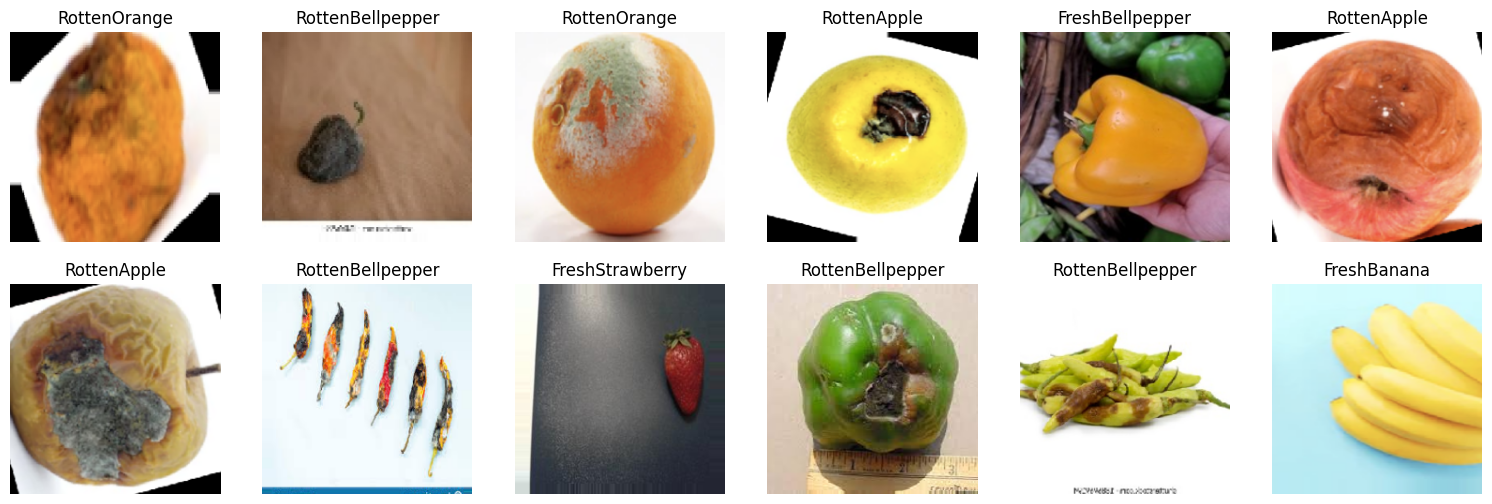

In [35]:
# visualize a batch of train data loader
images, labels = next(iter(train_generator))

fig = plt.figure(figsize=(19, 6))
rows, cols = 2, 6
for i in range(0, rows * cols):
    ax = fig.add_subplot(rows, cols, i+1)
    image_ = np.transpose(images[i], (0, 1, 2))
    plt.imshow(image_)
    plt.title(classes_subset[labels[i].argmax()])
    plt.axis(False);

In [36]:
# Construcción del modelo de red neuronal convolucional

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(classes_subset), activation='sigmoid'))

# Compilar el modelo CNN
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
# Entrenamiento del modelo
EPOCHS = 30

history_model = model.fit(
        train_generator,
        #steps_per_epoch=len(train_generator)//BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_generator,
        #validation_steps=len(val_generator)//BATCH_SIZE
    )

# Almacenamiento del modelo entrenado
model.save('model_saved.h5')

# Métricas de validación
score = model.evaluate(val_generator, steps=800)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
94/94 [==============================] - 892s 10s/step - loss: 1.8175 - accuracy: 0.3613 - val_loss: 1.0723 - val_accuracy: 0.6020
Epoch 2/30
94/94 [==============================] - 64s 679ms/step - loss: 0.9416 - accuracy: 0.6510 - val_loss: 0.8041 - val_accuracy: 0.7260
Epoch 3/30
94/94 [==============================] - 60s 641ms/step - loss: 0.7025 - accuracy: 0.7617 - val_loss: 0.6475 - val_accuracy: 0.7880
Epoch 4/30
94/94 [==============================] - 60s 642ms/step - loss: 0.5650 - accuracy: 0.7987 - val_loss: 0.5085 - val_accuracy: 0.8280
Epoch 5/30
94/94 [==============================] - 60s 643ms/step - loss: 0.4327 - accuracy: 0.8530 - val_loss: 0.5887 - val_accuracy: 0.7840
Epoch 6/30
94/94 [==============================] - 60s 634ms/step - loss: 0.4100 - accuracy: 0.8537 - val_loss: 0.5165 - val_accuracy: 0.8190
Epoch 7/30
94/94 [==============================] - 60s 637ms/step - loss: 0.3522 - accuracy: 0.8783 - val_loss: 0.4295 - val_accuracy: 0.8510


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 31/800 [>.............................] - ETA: 2:41 - loss: 0.6213 - accuracy: 0.8831

800/800 [==============================] - 7s 8ms/step - loss: 0.6197 - accuracy: 0.8830
Test loss: 0.6196528077125549
Test accuracy: 0.8830000162124634


In [38]:
# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [39]:
def plot_loss_curves(history_model):

    loss = history_model.history["loss"]
    val_loss = history_model.history["val_loss"]

    accuracy = history_model.history["accuracy"]
    val_accuracy = history_model.history["val_accuracy"]

    epochs = range(len(loss))

    plt.figure(figsize=(15, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

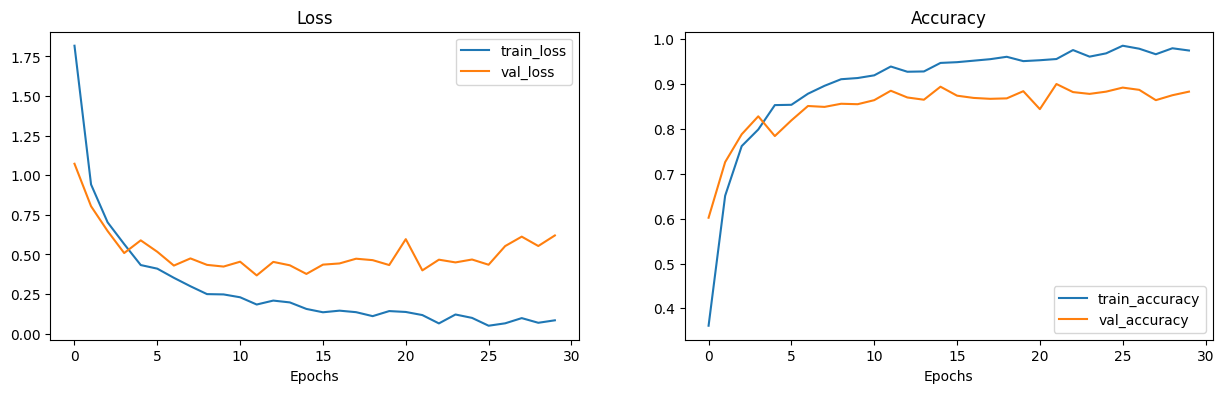

In [40]:
# Plot the loss curves of our model
plot_loss_curves(history_model)

In [41]:
# el modelo se comportaba de mejor forma al ser entrenado con menos imagenes
# en general, se mantiene la tendencia de las curvas de entrenamiento y validacion, sin embarg se aprecia overfitting.
# el modelo se podria potenciar aumentando el numero de capas, agregando dropout, batch normalization, etc.
# el modelo sera comparado con un modelo robusto pre entrenado en pytorch.
# realizar mas pruebas al modelo se complico debido al tiempo disponible de GPU en google colab.

# Inference / Load saved model

In [42]:
import skimage
from skimage import io
import tensorflow
from keras.preprocessing import image
from skimage.segmentation import mark_boundaries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [43]:
# load model

os.chdir("/content/drive/MyDrive/Modulo3_Grupo12")   # change dir to content/drive

model = tensorflow.keras.models.load_model('model_saved.h5')

In [44]:
# Métricas de validación load model
score = model.evaluate(test_generator, steps=1000)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

  16/1000 [..............................] - ETA: 7:24:28 - loss: 0.5717 - accuracy: 0.9040

1000/1000 [==============================] - 407s 407ms/step - loss: 0.5717 - accuracy: 0.9040
Test loss: 0.5717360973358154
Test accuracy: 0.9039999842643738


In [45]:
classes_subset = ['FreshApple', 'FreshBanana', 'FreshBellpepper', 'FreshOrange', 'FreshStrawberry',
                  'RottenApple', 'RottenBanana', 'RottenBellpepper', 'RottenOrange', 'RottenStrawberry']

In [47]:
#model = tensorflow.keras.models.load_model('model_saved.h5')

url = 'dataset_subset/test/RottenOrange/rotated_by_15_Screen Shot 2018-06-12 at 11.31.11 PM.png'

def read_and_transform_img(url):
    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

img = read_and_transform_img(url)

In [48]:
predictions = model.predict(img)
classes_subset[predictions.argmax()]

1/1 [==============================] - 1s 575ms/step


'RottenOrange'

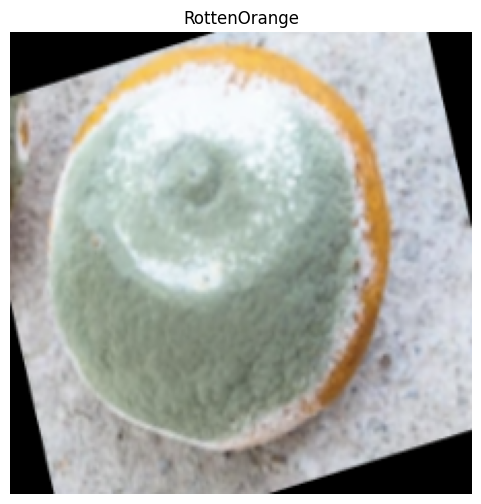

In [49]:
fig = plt.figure(figsize=(19, 6))
plt.imshow(np.squeeze(img))
plt.title(classes_subset[predictions.argmax()])
plt.axis(False);

In [50]:
# la imagen fue correctamente clasificada

# **PyTorch - Transfer Learnig**

- Algunas fuciones desplegadas en el prooceso anterior seran duplicadas con la finalidad de ejecutar para el apartadoo pytorch

In [54]:
!pip install torch torchvision torchaudio
!pip install torchinfo
import torch
import torchvision

from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchinfo import summary

print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


In [55]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import glob
import json
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from pathlib import Path

In [56]:
# clear cuda
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"
#device = 'cpu'
device

'cuda'

In [57]:
# configuration
EPOCHS = 30
SEED = 42
BATCH_SIZE = 32

In [58]:
# root path

os.chdir("/content/drive/MyDrive/Modulo3_Grupo12")   # change dir to content/drive

root_path = Path(os.getcwd())
print(root_path)

# directories
train_dir = root_path / "dataset_subset" / "train"
val_dir = root_path / "dataset_subset" / "val"
test_dir = root_path / "dataset_subset" / "test"

/content/drive/.shortcut-targets-by-id/1tObX7HBwT7-yVUt-iC0_FTfDWB4zOv75/Modulo3_Grupo12


In [59]:
# full dataset ..... make subset
classes_full = os.listdir(root_path / "dataset_full")
len(classes_full)

30

In [60]:
print(classes_full)

['FreshAlpukat', 'FreshCucumber', 'FreshOrange', 'FreshBellpepper', 'FreshMango', 'FreshCabbage', 'FreshCarrot', 'FreshDragonfruit', 'FreshBanana', 'FreshApple', 'FreshPapaya', 'FreshPotato', 'RottenBellpepper', 'RottenApple', 'RottenBanana', 'FreshTomato', 'FreshStrawberry', 'FreshSpinach', 'RottenAlpukat', 'RottenCarrot', 'RottenCabbage', 'RottenCucumber', 'RottenDragonfruit', 'RottenPapaya', 'RottenStrawberry', 'RottenOrange', 'RottenTomato', 'RottenPotato', 'RottenMango', 'RottenSpinach']


In [61]:
classes_subset = ['FreshApple', 'FreshBanana', 'FreshBellpepper', 'FreshOrange', 'FreshStrawberry',
                  'RottenApple', 'RottenBanana', 'RottenBellpepper', 'RottenOrange', 'RottenStrawberry']

### Create data splits dirs

In [62]:
import os
import random
import shutil

def create_data_splits(root_path,
                       classes_subset,
                       train_dir, test_dir, val_dir,
                       train_len, test_len, val_len,
                       SEED):

    # Set the manual seeds
    random.seed(SEED)

    for directory in [train_dir, test_dir, val_dir]:

        if os.path.exists(directory):
            shutil.rmtree(directory)

        if not os.path.exists(directory):
            os.makedirs(directory, exist_ok=True)
            [os.makedirs(os.path.join(directory, folder), exist_ok=True) for folder in classes_subset]

    # Iterate through each class
    for class_name in classes_subset:
        class_path = root_path / class_name
        images = os.listdir(class_path)

        # Shuffle the images to get a random sample
        random.shuffle(images)

        if (train_len+test_len+val_len) <= len(images):
            # Create symbolic links in train_dir
            for image in images[:train_len]:
                src_path = class_path / image
                dst_path = train_dir / class_name / image
                os.symlink(src_path, dst_path)

            # Create symbolic links in test_dir
            for image in images[train_len:train_len + test_len]:
                src_path = class_path / image
                dst_path = test_dir / class_name / image
                os.symlink(src_path, dst_path)

            # Create symbolic links in val_dir
            for image in images[train_len + test_len:train_len + test_len + val_len]:
                src_path = class_path / image
                dst_path = val_dir / class_name / image
                os.symlink(src_path, dst_path)
        else:
            print("total number of images is less than images to train, val, test")


In [63]:
# create_data_splits
SEED = 42

# amount of images to process
train_len=300
val_len=100
test_len=50

#create_data_splits(root_path / "dataset_full", classes_subset, train_dir, test_dir, val_dir, train_len, test_len, val_len, SEED)

In [64]:
# balanced data review dataset full
files_dataset_full = {'classes':[], 'len_files':[]}
for root_dir, cur_dir, files in os.walk(os.path.join(root_path / "dataset_full")):
    files_dataset_full['classes'].append(root_dir.split('/')[-1])
    files_dataset_full['len_files'].append(len(files))
pd.DataFrame(files_dataset_full).sort_values(by=['len_files'], ascending=False).T

15           14           9           10            26  \
classes    RottenBanana  RottenApple  FreshBanana  FreshApple  RottenOrange   
len_files          2800         2342         2205        1702          1605   

                    3            29            6              21  \
classes    FreshOrange  RottenMango  FreshCabbage  RottenCabbage   
len_files         1466         1410          1008            988   

                      30  ...              22                13            28  \
classes    RottenSpinach  ...  RottenCucumber  RottenBellpepper  RottenPotato   
len_files            880  ...             593               591           585   

                     20           11            1             24  \
classes    RottenCarrot  FreshPapaya  FreshAlpukat  RottenPapaya   
len_files           580          567           276           216   

                      19                 23            0   
classes    RottenAlpukat  RottenDragonfruit  dataset_full  
len_files            144                 20             0  

[2 rows x 31 columns]

In [65]:
# balanced data review train dataset subset
files_dataset_subset = {'classes':[], 'len_files':[]}
for root_dir, cur_dir, files in os.walk(os.path.join(root_path / "dataset_subset/train")):
    files_dataset_subset['classes'].append(root_dir.split('/')[-1])
    files_dataset_subset['len_files'].append(len(files))
pd.DataFrame(files_dataset_subset).sort_values(by=['len_files'], ascending=False).T

1            2                3            4   \
classes    FreshApple  FreshBanana  FreshBellpepper  FreshOrange   
len_files         300          300              300          300   

                        5            6             7                 8   \
classes    FreshStrawberry  RottenApple  RottenBanana  RottenBellpepper   
len_files              300          300           300               300   

                     9                 10     0   
classes    RottenOrange  RottenStrawberry  train  
len_files           300               300      0

In [66]:
# balanced data review val dataset subset
files_dataset_subset = {'classes':[], 'len_files':[]}
for root_dir, cur_dir, files in os.walk(os.path.join(root_path / "dataset_subset/val")):
    files_dataset_subset['classes'].append(root_dir.split('/')[-1])
    files_dataset_subset['len_files'].append(len(files))
pd.DataFrame(files_dataset_subset).sort_values(by=['len_files'], ascending=False).T

1            2                3            4   \
classes    FreshApple  FreshBanana  FreshBellpepper  FreshOrange   
len_files         100          100              100          100   

                        5            6             7                 8   \
classes    FreshStrawberry  RottenApple  RottenBanana  RottenBellpepper   
len_files              100          100           100               100   

                     9                 10   0   
classes    RottenOrange  RottenStrawberry  val  
len_files           100               100    0

In [67]:
# balanced data review test dataset subset
files_dataset_subset = {'classes':[], 'len_files':[]}
for root_dir, cur_dir, files in os.walk(os.path.join(root_path / "dataset_subset/test")):
    files_dataset_subset['classes'].append(root_dir.split('/')[-1])
    files_dataset_subset['len_files'].append(len(files))
pd.DataFrame(files_dataset_subset).sort_values(by=['len_files'], ascending=False).T

1            2                3            4   \
classes    FreshApple  FreshBanana  FreshBellpepper  FreshOrange   
len_files          50           50               50           50   

                        5            6             7                 8   \
classes    FreshStrawberry  RottenApple  RottenBanana  RottenBellpepper   
len_files               50           50            50                50   

                     9                 10    0   
classes    RottenOrange  RottenStrawberry  test  
len_files            50                50     0

# Setup pytorch pretrained model

### Pytorch trained models
https://pytorch.org/vision/stable/models.html

In [68]:
# Initialize model with the best available weights
weights = torchvision.models.EfficientNet_V2_S_Weights.DEFAULT
model = torchvision.models.efficientnet_v2_s(weights=weights).to(device)
model.classifier

Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:00<00:00, 127MB/s]


Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [69]:
# Freeze / (or not) all of the base layers in the model
for param in model.parameters():
  param.requires_grad = False

In [70]:
# Set the manual seeds, we are creating a new layer (torch.nn.Linear) with random weights.
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
random.seed(SEED)

# Update the classifier layer to our number of classes following 'model.classifier' output
model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280,
              out_features=len(classes_subset))).to(device) # how many classes

model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=10, bias=True)
)

In [72]:
# Print with torchinfo model characteristics .... Check trainable params
from torchinfo import summary

summary(model=model,
        input_size=(1, 3, 224, 224), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 10]              --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 24, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 24, 112, 112]    (648)                False
│    │    └─BatchNorm2d (1)                                  [1, 24, 112, 112]    [1, 24, 112, 112]    (48)                 False
│    │    └─SiLU (2)                                         [1, 24, 112, 112]    [1, 24, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 24, 112, 112]    [1, 2

In [73]:
# get transforms parameter of the original trained model
transform = weights.transforms()
transform

ImageClassification(
    crop_size=[384]
    resize_size=[384]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

### Setup Dataset / DataLoaders

In [74]:
# Create training and testing Dataset, and get a list of class names
train_dataset = torchvision.datasets.ImageFolder(train_dir, transform=transform)
val_dataset = torchvision.datasets.ImageFolder(val_dir, transform=transform)
test_dataset = torchvision.datasets.ImageFolder(test_dir, transform=transform)

In [75]:
# class_names from dataset
class_names = train_dataset.classes
print(len(class_names))
print(class_names)
print(" ")
print(train_dataset.class_to_idx)

10
['FreshApple', 'FreshBanana', 'FreshBellpepper', 'FreshOrange', 'FreshStrawberry', 'RottenApple', 'RottenBanana', 'RottenBellpepper', 'RottenOrange', 'RottenStrawberry']
 
{'FreshApple': 0, 'FreshBanana': 1, 'FreshBellpepper': 2, 'FreshOrange': 3, 'FreshStrawberry': 4, 'RottenApple': 5, 'RottenBanana': 6, 'RottenBellpepper': 7, 'RottenOrange': 8, 'RottenStrawberry': 9}


In [76]:
# save class file
with open("classes_trained", "w") as fj:
    json.dump(class_names, fj)

In [77]:
# Turn datasets into dataLoaders
train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, num_workers=0, shuffle=True)
val_dataloader  = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, num_workers=0, shuffle=False)
test_dataloader  = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, num_workers=0, shuffle=False)

train_dataloader, val_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f024ceedc90>,
 <torch.utils.data.dataloader.DataLoader at 0x7f024ceee500>)

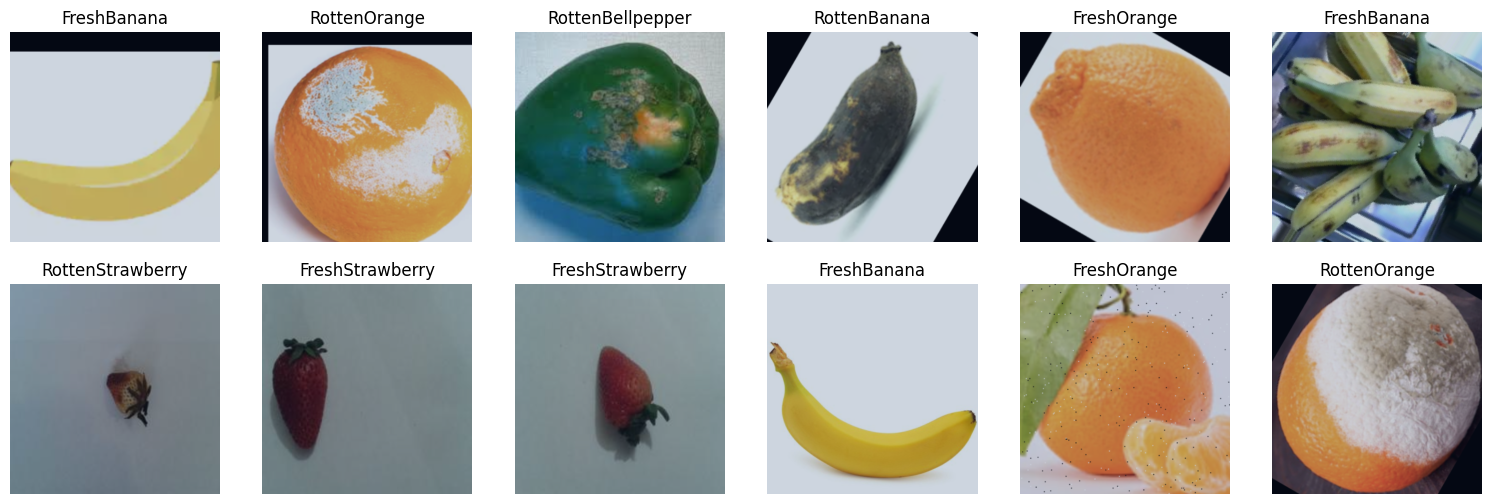

In [78]:
# visualize a batch of train data loader
images, labels = next(iter(train_dataloader))
images = images.numpy() # convert images to numpy for display

fig = plt.figure(figsize=(19, 6))
rows, cols = 2, 6
for i in range(0, rows * cols):
    ax = fig.add_subplot(rows, cols, i+1)
    image_ = np.transpose(images[i], (1, 2, 0))
    image_ = image_*[0.18]+[0.4] # unnormalize
    plt.imshow(image_)
    plt.title(class_names[labels[i].item()])
    plt.axis(False);

### Training model

In [79]:
""" training and testing a PyTorch model """

from tqdm.auto import tqdm
from datetime import datetime

timestamp = datetime.now().strftime('%Y%m%d%H%M')

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device):

    """ Trains a PyTorch model for a single epoch """

    model.to(device)
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values to zero
    train_loss, train_acc = 0, 0

    # Loop through dataloader batches
    for batch, (X, y) in tqdm(enumerate(dataloader), desc='Training Step', leave=False) :
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)

        # Calculate and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric classification across batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def validation_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device):

    """ Tests a PyTorch model for a single epoch """

    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values to zero
    validation_loss, validation_acc = 0, 0

    # Turn on inference context manager
    with torch.no_grad():
        # Loop through DataLoader batches
        for batch, (X, y) in tqdm(enumerate(dataloader), desc='Validation Step', leave=False):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # Forward pass
            validation_pred_logits = model(X)

            # Calculate and accumulate loss
            loss = loss_fn(validation_pred_logits, y)
            validation_loss += loss.item()

            # Calculate and accumulate accuracy
            validation_pred_labels = validation_pred_logits.argmax(dim=1)
            validation_acc += ((validation_pred_labels == y).sum().item()/len(validation_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    validation_loss = validation_loss / len(dataloader)
    validation_acc = validation_acc / len(dataloader)
    return validation_loss, validation_acc

def run_model(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          validation_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          scheduler:torch.optim,
          early_stopping,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device,
          model_name):

    """ Trains and tests a PyTorch model """

    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "validation_loss": [],
               "validation_acc": []
    }

    # Training and validation loop
    best_vloss = float('inf')

    for epoch in tqdm(range(epochs)):

        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)

        validation_loss, validation_acc = validation_step(model=model,
                                        dataloader=validation_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        scheduler.step(validation_loss)

        # Print out running process
        print(f"Epoch: {epoch+1} | "
              f"lr: {optimizer.param_groups[0]['lr']} | "
              f"train_loss: {train_loss:.4f} | "
              f"train_acc: {train_acc:.4f} | "
              f"validation_loss: {validation_loss:.4f} | "
              f"validation_acc: {validation_acc:.4f}")

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["validation_loss"].append(validation_loss)
        results["validation_acc"].append(validation_acc)


        if not os.path.exists("models"):
            os.makedirs("models/", exist_ok=True)

        # Track best performance, and save the model's state
        if validation_loss < best_vloss:
            best_vloss = validation_loss
            model_path_state_dict = f"models/{model_name}_state_dict.pth"
            torch.save(model.state_dict(), model_path_state_dict)
            model_path_full = f"models/{model_name}_full.pth"
            torch.save(model, model_path_full)
            print(f"model saved at epoch: {epoch+1}")

        # early stopping
        early_stopping(validation_loss)  # Monitor validation accuracy
        if early_stopping.early_stop:
          print(f"early stopping at epoch: {epoch}")
          break

    # Return results at the end of epochs
    return results


In [80]:
class EarlyStopping:
  def __init__(self, patience=5, verbose=False, delta=0.001):

    self.patience = patience
    self.verbose = verbose
    self.delta = delta
    self.best_score = None
    self.early_stop = False

  def __call__(self, val_loss):

    if self.best_score is None:
      self.best_score = val_loss
    elif (self.best_score - val_loss) < self.delta:
      self.patience -= 1
      if self.verbose and self.patience > 0:
        print(f'Loss validation not improved enough for {self.patience} epochs yet.  Waiting...')
    else:
      self.best_score = val_loss
      self.patience = self.patience  # reset patience if validation loss improves

    if self.patience <= 0:
      if self.verbose:
        print('Early stopping triggered.')
      self.early_stop = True

In [81]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, threshold=0.0001, threshold_mode='rel')
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
early_stopping = EarlyStopping(patience=7, verbose=True)

In [82]:
# Set the manual seeds
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
random.seed(SEED)

from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d%H%M')
model_name_saved = f'{timestamp}_{model.__class__.__name__}'
print(model_name_saved)

# Start the timer
from timeit import default_timer as timer
start_time = timer()
print(datetime.now())

# Setup training and save the results
results = run_model(model=model,
                       train_dataloader=train_dataloader,
                       validation_dataloader=val_dataloader,
                       optimizer=optimizer,
                       scheduler=scheduler,
                       early_stopping=early_stopping,
                       loss_fn=loss_fn,
                       epochs=EPOCHS,
                       device=device,
                       model_name=model_name_saved)

# End the timer
end_time = timer()
print(f"[INFO] Total training time: {((end_time-start_time)/60):.3f} minutes")

202404251830_EfficientNet
2024-04-25 18:30:12.153506


  0%|          | 0/30 [00:00<?, ?it/s]

Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 1 | lr: 0.001 | train_loss: 1.0372 | train_acc: 0.8059 | validation_loss: 0.4647 | validation_acc: 0.9150
model saved at epoch: 1


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 2 | lr: 0.001 | train_loss: 0.3913 | train_acc: 0.9225 | validation_loss: 0.2908 | validation_acc: 0.9355
model saved at epoch: 2


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 3 | lr: 0.001 | train_loss: 0.2777 | train_acc: 0.9385 | validation_loss: 0.2309 | validation_acc: 0.9482
model saved at epoch: 3


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 4 | lr: 0.001 | train_loss: 0.2205 | train_acc: 0.9510 | validation_loss: 0.2066 | validation_acc: 0.9521
model saved at epoch: 4


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 5 | lr: 0.001 | train_loss: 0.1891 | train_acc: 0.9536 | validation_loss: 0.1719 | validation_acc: 0.9600
model saved at epoch: 5


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 6 | lr: 0.001 | train_loss: 0.1666 | train_acc: 0.9612 | validation_loss: 0.1574 | validation_acc: 0.9570
model saved at epoch: 6


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 7 | lr: 0.001 | train_loss: 0.1466 | train_acc: 0.9656 | validation_loss: 0.1367 | validation_acc: 0.9619
model saved at epoch: 7


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 8 | lr: 0.001 | train_loss: 0.1382 | train_acc: 0.9649 | validation_loss: 0.1377 | validation_acc: 0.9619
Loss validation not improved enough for 6 epochs yet.  Waiting...


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 9 | lr: 0.001 | train_loss: 0.1245 | train_acc: 0.9684 | validation_loss: 0.1267 | validation_acc: 0.9648
model saved at epoch: 9


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 10 | lr: 0.001 | train_loss: 0.1158 | train_acc: 0.9699 | validation_loss: 0.1186 | validation_acc: 0.9648
model saved at epoch: 10


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 11 | lr: 0.001 | train_loss: 0.1055 | train_acc: 0.9764 | validation_loss: 0.1124 | validation_acc: 0.9688
model saved at epoch: 11


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 12 | lr: 0.001 | train_loss: 0.1051 | train_acc: 0.9761 | validation_loss: 0.1102 | validation_acc: 0.9648
model saved at epoch: 12


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 13 | lr: 0.001 | train_loss: 0.1026 | train_acc: 0.9747 | validation_loss: 0.1140 | validation_acc: 0.9648
Loss validation not improved enough for 5 epochs yet.  Waiting...


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 14 | lr: 0.001 | train_loss: 0.1013 | train_acc: 0.9724 | validation_loss: 0.1027 | validation_acc: 0.9678
model saved at epoch: 14


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 15 | lr: 0.001 | train_loss: 0.0848 | train_acc: 0.9801 | validation_loss: 0.1013 | validation_acc: 0.9639
model saved at epoch: 15


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 16 | lr: 0.001 | train_loss: 0.0851 | train_acc: 0.9791 | validation_loss: 0.1050 | validation_acc: 0.9648
Loss validation not improved enough for 4 epochs yet.  Waiting...


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 17 | lr: 0.001 | train_loss: 0.0794 | train_acc: 0.9794 | validation_loss: 0.0995 | validation_acc: 0.9668
model saved at epoch: 17


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 18 | lr: 0.001 | train_loss: 0.0835 | train_acc: 0.9751 | validation_loss: 0.0966 | validation_acc: 0.9688
model saved at epoch: 18


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 19 | lr: 0.001 | train_loss: 0.0818 | train_acc: 0.9736 | validation_loss: 0.0873 | validation_acc: 0.9707
model saved at epoch: 19


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 20 | lr: 0.001 | train_loss: 0.0686 | train_acc: 0.9834 | validation_loss: 0.0905 | validation_acc: 0.9678
Loss validation not improved enough for 3 epochs yet.  Waiting...


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 21 | lr: 0.001 | train_loss: 0.0736 | train_acc: 0.9777 | validation_loss: 0.0840 | validation_acc: 0.9688
model saved at epoch: 21


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 22 | lr: 0.001 | train_loss: 0.0690 | train_acc: 0.9834 | validation_loss: 0.0978 | validation_acc: 0.9639
Loss validation not improved enough for 2 epochs yet.  Waiting...


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 23 | lr: 0.001 | train_loss: 0.0687 | train_acc: 0.9814 | validation_loss: 0.0884 | validation_acc: 0.9668
Loss validation not improved enough for 1 epochs yet.  Waiting...


Training Step: 0it [00:00, ?it/s]

Validation Step: 0it [00:00, ?it/s]

Epoch: 24 | lr: 0.001 | train_loss: 0.0651 | train_acc: 0.9824 | validation_loss: 0.0869 | validation_acc: 0.9688
Early stopping triggered.
early stopping at epoch: 23
[INFO] Total training time: 40.701 minutes


In [83]:
def plot_loss_curves(results):
    loss = results["train_loss"]
    val_loss = results["validation_loss"]

    accuracy = results["train_acc"]
    val_accuracy = results["validation_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

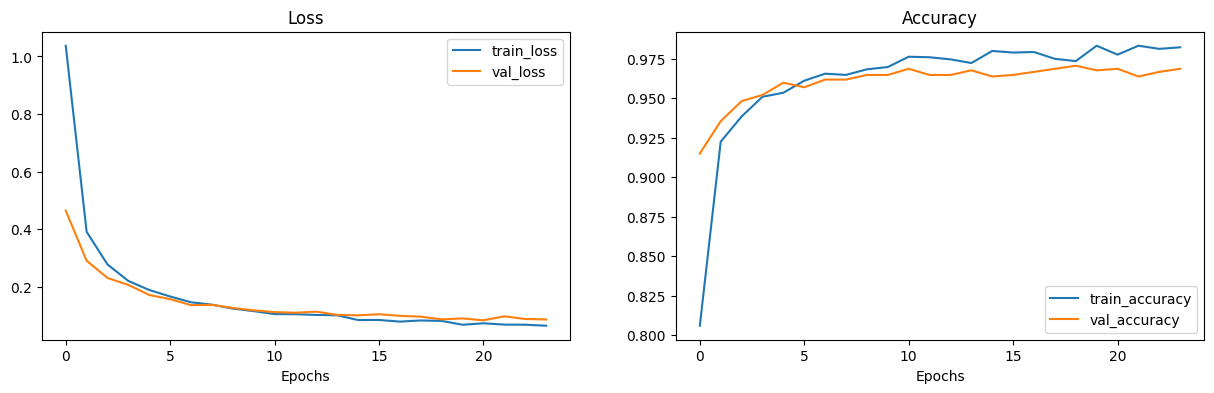

In [84]:
# Plot the loss curves of our model
plot_loss_curves(results)

# Inference / Load saved model

In [85]:
import torch
import torchvision
import json
import matplotlib.pyplot as plt
import os
import random

from PIL import Image
from pathlib import Path

device = "cuda" if torch.cuda.is_available() else "cpu"
#device = 'cpu'
device

'cuda'

In [86]:
# load model using full model saved
# load weights for getting transform
weights = torchvision.models.EfficientNet_V2_S_Weights.DEFAULT
transform = weights.transforms()
model_load = torch.load(f'models/{model_name_saved}_full.pth')
#model_load

In [87]:
# Opening file trained classes
f = open('classes_trained')
# json to dictionary
classes_trained = json.load(f)
# Closing file
f.close()
print(f'trained classes names: {classes_trained}')

trained classes names: ['FreshApple', 'FreshBanana', 'FreshBellpepper', 'FreshOrange', 'FreshStrawberry', 'RottenApple', 'RottenBanana', 'RottenBellpepper', 'RottenOrange', 'RottenStrawberry']


In [88]:
def pred_and_plot_image(
    model: torch.nn.Module,
    image_path: str,
    classes_names_trained,
    transform,
    device):

    image = Image.open(image_path) # Load in image

    image = transform(image).unsqueeze(0).to(device) # Transform the image, add batch dimension and put image on target device

    model.to(device) # model on the target device
    model.eval() # Turn on model evaluation mode and inference mode

    pred_dict = {}

    with torch.no_grad():
        pred_logit = model(image) # perform inference on target sample
        pred_prob = torch.softmax(pred_logit, dim=1) # turn logits into prediction probabilities
        pred_label = torch.argmax(pred_prob, dim=1) # turn prediction probabilities into prediction label
        #pred_class = classes_name[str(pred_label.cpu().item())] #

        # put in the dictionary
        pred_dict["pred_prob"] = round(pred_prob.unsqueeze(0).max().cpu().item(), 4)
        pred_dict["pred_label"] = pred_label

        pred_dictionary.append(pred_dict)

    # Plot the image
    plt.imshow(image.squeeze().permute(1, 2, 0).cpu().numpy()*[0.18]+[0.4]) # unnormalize

    if classes_names_trained:
        title = f"{classes_names_trained[pred_label.cpu().item()]} | Prob: {pred_prob.max().cpu():.4f}"
    else:
        title = f"{pred_label.cpu().item()} | Prob: {pred_prob.max().cpu():.4f}"

    plt.title(title)
    plt.axis(False)

    return pred_dictionary

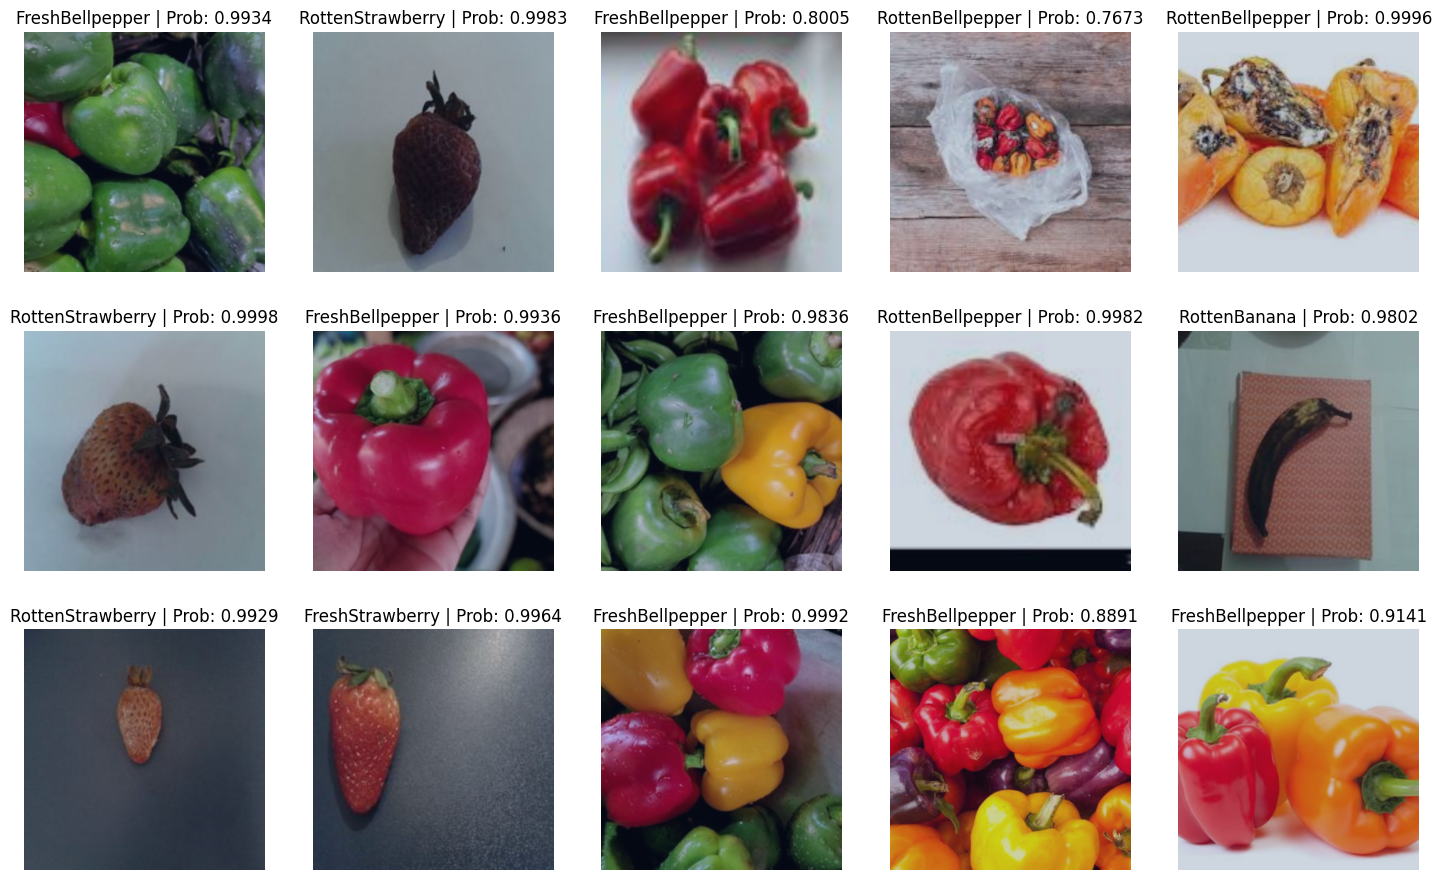

In [90]:
# Set the manual seeds
SEED2=28
torch.manual_seed(SEED2)
torch.cuda.manual_seed(SEED2)
random.seed(SEED2)

root_path = Path(os.getcwd())
# Get a list of all test image filepaths
test_dir = root_path / "dataset_subset" / "test"
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))

pred_dictionary=[]

# Randomly select a test image path
img_paths = random.sample(test_data_paths, k=15)

fig = plt.figure(figsize=(18, 11))
rows, cols = 3, 5
for i in range(0, rows * cols):
    ax = fig.add_subplot(rows, cols, i+1)
    img = img_paths[i]
    pred_dictionary = pred_and_plot_image(model_load, img, classes_trained, transform, device)



*   Si bien en pytorch al principio hay mas codigo que escribir, el proceso de creacion de dataset, entrenamiento, y visualisacion, es mas amigable que en tensorflow/keras.
*   Tambien se facilita el procesamiento en GPU, nos encontramos con el incomveniente al usar Tensorflow de las versiones disponibles en google colab y computador propio, no se encontro o no esta disponible la misma version para instalar en computador.  (2.15 y 2.16)

*  En PyTorch se ocupo earlyStopping con paciencia de 7 epocas (cambiar a 5), si las metricas no mejoran en este lapso, el modelo termina de entrenar. Esto mismo podria haber sido utilizado en tensorflowww llamando a earlyStopping mediante Callback.

*  Claramente, al usar un modelo pre enstrenado, y tambien mas robusto, se obtienen mejores resultados que con el creado en tensorfloww. Ademas, la gran ventaja de un modelo pre entrenado, al utilizar los pesos de las convoluciones entrenadas, es el tiempo de entrenamiento, ya que los parametros a entrenar (freezing convoluciones), se reduce a la clasificacion (dense layer)



### **Implementación de la interpretabilidad para una red neuronal convolucional tensorflow con el Framework LIME**

LIME (Local Interpretable Model-agnostic Explanations)

1. images[0].astype('double'):

images[0]: Selecciona la primera imagen de tu conjunto de imágenes (images).

.astype('double'): Convierte la imagen a tipo de dato double. LIME requiere que las entradas sean de tipo flotante para realizar operaciones matemáticas.

2. model.predict:

Es la función de predicción de tu modelo. LIME la usará para obtener predicciones del modelo y construir sus explicaciones.

3. top_labels=3:

Solicita que LIME genere explicaciones para las tres clases principales (las que tienen las mayores probabilidades de predicción).

4. hide_color=0:

Especifica el color que se usará para ocultar partes de la imagen durante el proceso de explicación. Un valor de 0 significa que no se ocultará ninguna parte de la imagen.

5. num_samples=1000:

Especifica el número de muestras que LIME utilizará para generar las explicaciones. Cuanto mayor sea este número, más preciso será el método LIME, pero también llevará más tiempo computacional.

In [91]:
!pip install lime

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 59ms/step


(-0.5, 223.5, 223.5, -0.5)

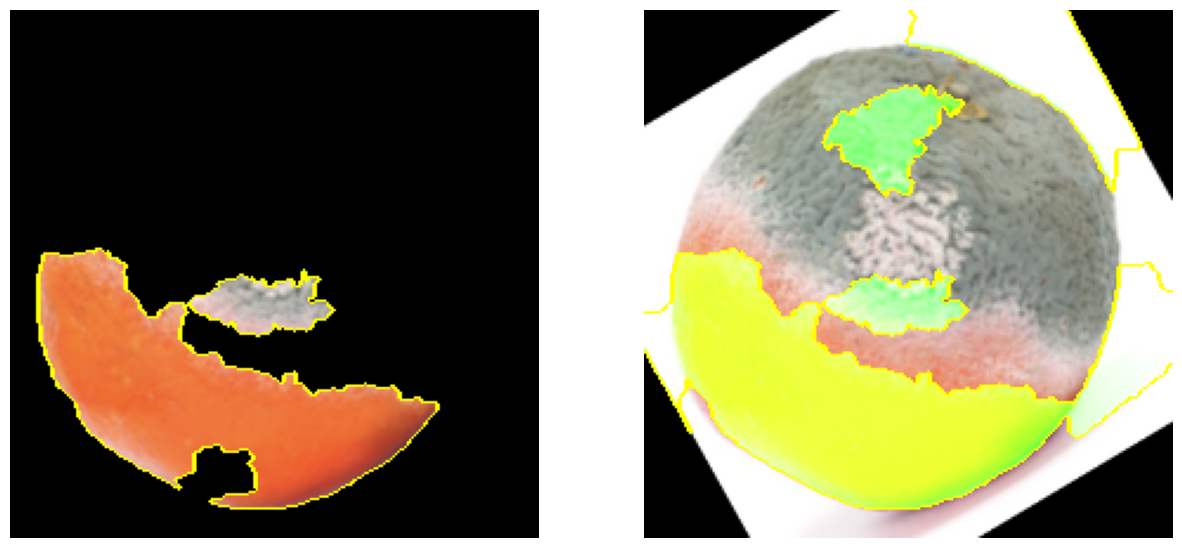

In [92]:
from lime import lime_image
import skimage
from skimage import io
import tensorflow
from tensorflow import keras
from keras.preprocessing import image
from skimage.segmentation import mark_boundaries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

os.chdir("/content/drive/MyDrive/Modulo3_Grupo12")   # change dir to content/drive

model = tensorflow.keras.models.load_model('model_saved.h5')

url = 'dataset_subset/test/RottenOrange/rotated_by_30_Screen Shot 2018-06-12 at 11.36.24 PM.png'

def read_and_transform_img(url):
    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

images = read_and_transform_img(url)

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=1000)
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

### **INTERPRETAR LA IMAGEN RESULTANTE - AYUDADO POR CHATGPT**

La imagen resultante de LIME es una visualización que muestra qué partes de la imagen contribuyen más a la predicción del modelo para una clase específica. Esta visualización se obtiene al resaltar las partes más importantes de la imagen para la predicción de la clase en cuestión.

Aquí hay algunas pautas generales para interpretar la imagen de LIME:

Superposición de Color:

Las áreas de la imagen que están coloreadas son las que tienen un impacto significativo en la predicción de la clase.
Cuanto más intenso es el color, más importante es esa área para la predicción.
Color:

Si el color es positivo (por ejemplo, tonos de rojo), significa que esa área de la imagen está contribuyendo positivamente a la probabilidad de esa clase.
Si el color es negativo (por ejemplo, tonos de azul), significa que esa área está contribuyendo negativamente o disminuyendo la probabilidad de esa clase.
Áreas Resaltadas:

Las áreas más resaltadas o coloreadas son las que tienen mayor influencia en la predicción de la clase en cuestión.
Si ves áreas resaltadas en partes específicas de la imagen, esto indica que esas características o patrones son importantes para la clasificación de esa clase.
Comparación con la Clasificación Real:

Para una interpretación más completa, compara las áreas resaltadas con las características reales de la imagen.
Pregúntate si las áreas resaltadas tienen sentido en el contexto de la clase predicha. Por ejemplo, si es una imagen de un gato y las patas del gato están resaltadas para la clase "gato", eso tiene sentido.
Interpretación Contextual:

La interpretación de las visualizaciones de LIME también depende del contexto y del dominio del problema.
Conocer el contexto del problema te ayudará a entender mejor por qué ciertas áreas de la imagen son importantes para el modelo.
Recuerda que las explicaciones de LIME son aproximaciones y están destinadas a ser interpretadas como una guía más que como una certeza absoluta. Es una herramienta útil para entender el comportamiento del modelo y las características que considera importantes para sus predicciones, pero siempre es bueno tomarlas con cautela y en conjunto con otros métodos de interpretación y análisis.
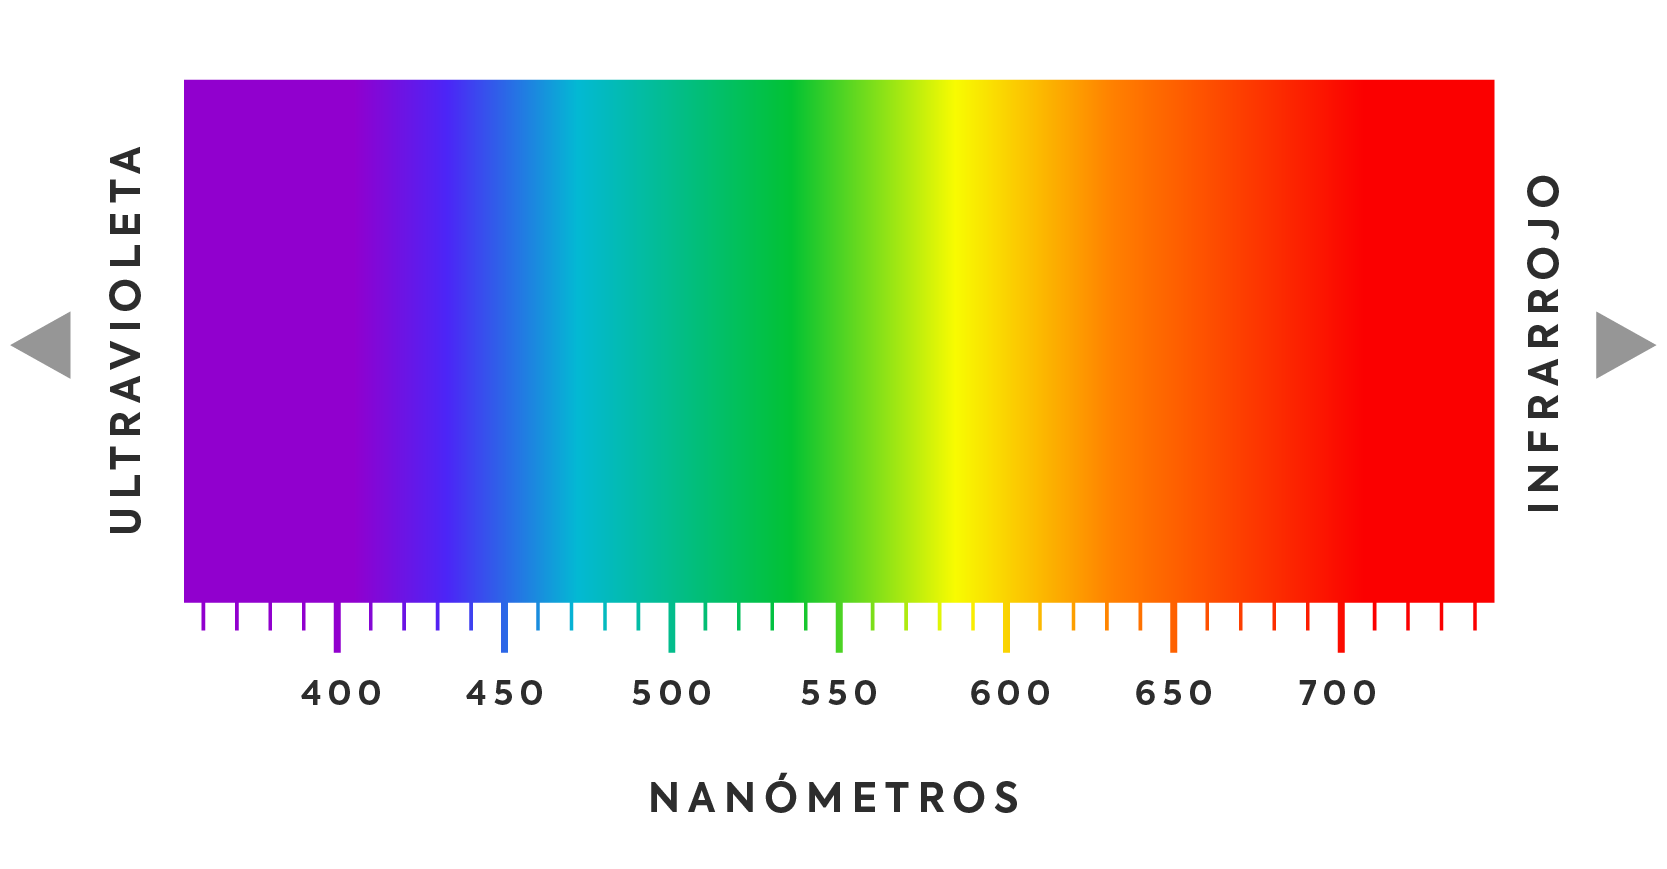